In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:
student_data = pd.read_csv("student_data.csv")
student_data =  student_data.drop("Race", axis= 1)

In [3]:
df_feautures = pd.DataFrame(student_data, columns=student_data.columns[:-1])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df_feautures)

StandardScaler()

In [8]:
scaled_features = scaler.transform(df_feautures)

In [9]:
df_feautures = pd.DataFrame(df_feautures, columns=student_data.columns[:-1])

In [10]:
X = df_feautures
y = student_data['Dropout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=100)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Errror Rate')

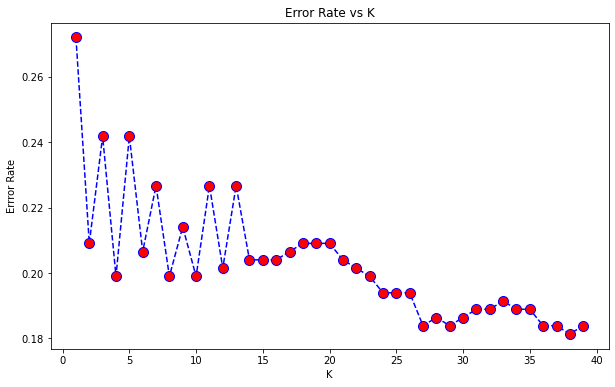

In [13]:
plt.figure(figsize= (10, 6))
plt.plot(range(1,40), error_rate,color = "blue", linestyle = 'dashed', marker = 'o', markerfacecolor ="red", markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Errror Rate')

In [14]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('/n')
print(classification_report(y_test, pred))

[[297  30]
 [ 60  10]]
/n
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       327
           1       0.25      0.14      0.18        70

    accuracy                           0.77       397
   macro avg       0.54      0.53      0.53       397
weighted avg       0.73      0.77      0.75       397

